<a href="https://colab.research.google.com/github/pea2/hello-world/blob/master/hw2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCE 623 Homework Assignment 2


### Student Name:  <font color="blue">Solution</font>

### Date: <font color="blue">April 13, 2021</font>

## Disclosures

*   Install the Python package adjustText

## Overview

In this homework assignment, you will play the role of a machine learning engineer. A vendor has provided you three datasets. The datasets are generically named, "Dataset 1", "Dataset 2", and "Dataset 3." For each dataset, you will analyze the performance of three machine learning algorithms: logistic regression, linear discriminant analysis, and quadratic discriminant analysis, and a single tunable parameter, "threshold."

To support our simulated scenario, you will train and evaluate models using "phase 1" data for each dataset. Based on your analysis, you'll recommend a model and threshold parameter for each dataset. Finally, you'll demonstrate the performance of your recommendations on "phase 2" data.

The goal of this homework assignment is not necessarily to attempt to maximize the performance of any model on the "phase 2" data. Rather, our goal is to encourage critical thinking and analysis to support high-quality decision-making using the tools you've been introduced to so far and those that you'll learn to use in this homework assignment.

We've provided you with three datasets. For **EACH** dataset, you will accomplish all the steps enumerated below. ***Where appropriate, use helper functions to complete repeated tasks.***

This assignment includes both written and programming components.

### Written Components
Full effort answers to written components should include not only the answer to the question, but they should also include supporting information. You should provide justification or supporting information even if the question only asks for a single number or short answer.

### Programming Components
Use Python to perform any manipulations you make to provided datasets, all calculations and mathematical transformations, and to generate graphs, figures, or other support to explain how you arrived at your written answers.

### Helpful Tips

You might find these Python packages/imports helpful

``` python
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as col

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score

from IPython.display import Markdown as md


from adjustText import adjust_text
```

## Classification

### STEP 0: installs & configuration

Install any packages you need for your notebook. If using the Google Colab environment, you will not need to install any additional packages.

In [ ]:
"""
CSCE 623 HW2. Classification
"""

# install packages, set configuration, as needed
!pip install adjustText

DEBUG = False 

Import any packages you need for your notebook

In [ ]:
# import pacakages for your notebook

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as col

import matplotlib.patches as mpatches

from IPython.display import Markdown as md
from IPython.display import display, Math, Latex

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve


from adjustText import adjust_text
%matplotlib inline

### Data Analysis

In steps 1-2, you'll import and conduct an analysis of three datasets, `dataset1.csv`,  `dataset2.csv`, `dataset3.csv` datasets.

#### STEP 1: load datasets

For this assignment, you will use three datasets:

- hw2_dataset1.csv dataset located at https://raw.githubusercontent.com/afit-csce623-master/datasets/main/hw2_dataset1.csv
- hw2_dataset2.csv dataset located at https://raw.githubusercontent.com/afit-csce623-master/datasets/main/hw2_dataset2.csv
- hw2_dataset3.csv dataset located at https://raw.githubusercontent.com/afit-csce623-master/datasets/main/hw2_dataset3.csv

You can view the dataset by clicking on the links above. Note that the data has a header row and a header column. Data appears in the three remaining columns. The first two data columns are features and the last data column is a class value. Load the dataset so that the columns are named `X1`, `X2`, and `Class`, respectively, discarding the raw data's original header row and column. Throughout this assignment, we will refer to the classes having a value of `0.0` as "Class 0" and those having a value of `1.0` as "Class 1".

Store the datasets in `pandas` `dataframe` named `df1`, `df2`, and `df3`, respectively.

For example, the `head` of `df1` will appear as follows:

```
         X1        X2  Class
0  0.548814  0.715189    0.0
1  0.602763  0.544883    0.0
2  0.423655  0.645894    0.0
3  0.437587  0.891773    0.0
4  0.963663  0.383442    0.0
```

And the `info` of `df1` will appear as follows:
```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      600 non-null    float64
 1   X2      600 non-null    float64
 2   Class   600 non-null    float64
dtypes: float64(3)
memory usage: 18.8 KB
```

Refer to the [`pandas.read_csv` documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) as needed.


In [ ]:
#STEP 1

#STUDENT CODE - insert code to load three datasets using pandas
# store your data in a dataframes called 'df1', 'df2', and 'df3'
#--------------------------------------------- 

def load_data(url):
    return pd.read_csv(url, header=0, names=['X1', 'X2', 'Class'], index_col=0)

df1 = load_data('https://raw.githubusercontent.com/afit-csce623-master/datasets/main/hw2_dataset1.csv')
df2 = load_data('https://raw.githubusercontent.com/afit-csce623-master/datasets/main/hw2_dataset2.csv')
df3 = load_data('https://raw.githubusercontent.com/afit-csce623-master/datasets/main/hw2_dataset3.csv')
#---------------------------------------------    

STEP_1_COMPLETE = True

#### STEP 2: plot datasets

Explore each dataset by plotting datapoints in scatterplot with X1 value along the x-axis and X2 value along the y-axis. Color each datapoint according to class: one red, and the other blue.

Label your plot, including x and y axes, title, and legend.

For example, the plot of dataset1 might look something like this:

<img src='https://github.com/afit-csce623-master/template-hw2/blob/main/images/dataset1_data_plot.png?raw=1' />

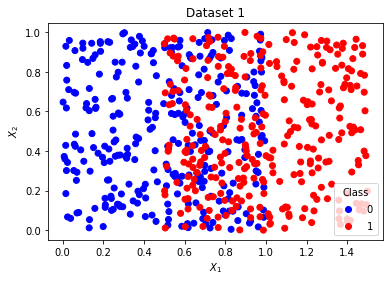

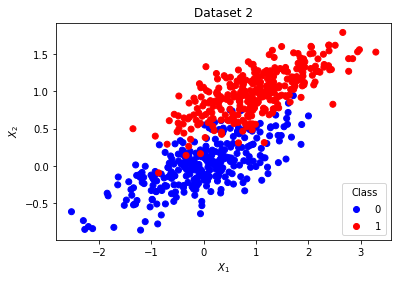

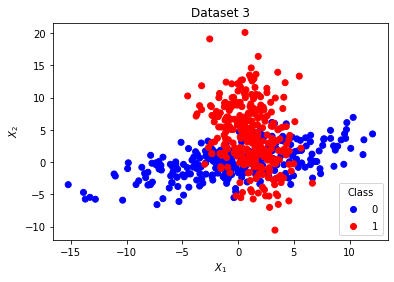

In [ ]:
#STEP 2

#STUDENT CODE - Insert code to plot the datasets here
#---------------------------------------------
def class_scatter(df, title):

    scatter = plt.scatter(df['X1'], df['X2'], c=df['Class'], cmap=plt.cm.bwr)
    plt.legend(*scatter.legend_elements(), loc='lower right', title='Class')

    # alternative approach 1
    # colors=['red', 'blue']
    # categories = df.groupby('Class')
    # for class_value, category in categories:
    #     plt.plot(category['X1'], category['X2'], marker='o', linestyle='', label=class_value, c=colors[int(class_value)])
    # plt.legend(['Class A', 'Class B'], loc='lower right', title='Class')

    # alternative approach 2
    # colors=['red', 'blue']
    # plt.scatter(df['X1'], df['X2'], c=df['Class'], cmap=col.ListedColormap(colors))
    # classA = mpatches.Patch(color='red', label='Class A')
    # classB = mpatches.Patch(color='blue', label='Class B')
    # plt.legend(handles=[classA, classB], loc='lower right', title='Class')

    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.title(title)
    plt.show()

class_scatter(df1, 'Dataset 1')
class_scatter(df2, 'Dataset 2')
class_scatter(df3, 'Dataset 3')

#--------------------------------------------- 

STEP_2_COMPLETE = True

#### STEP 3: analyze datasets

Continue your visual analysis of the datasets by using the `describe` functions on each dataset as well as the subset of dataset by class. Generate covariance matrices of each class of each dataset. Create relevant pairplots and histograms.


Dataset 1 Statistics:

,X1,X2,Class
count,600.000000,600.000000,600.000000
mean,0.747401,0.494678,0.500000
std,0.380747,0.296411,0.500417
min,0.002703,0.000546,0.000000
25%,0.510941,0.244774,0.000000
50%,0.730347,0.466113,0.500000
75%,0.984056,0.754525,1.000000
max,1.499809,0.999278,1.000000


Dataset 1 Class A Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,0.499781,0.496625,0.0
std,0.286360,0.300674,0.0
min,0.002703,0.004695,0.0
25%,0.253867,0.242792,0.0
50%,0.519936,0.457914,0.0
75%,0.724439,0.762296,0.0
max,0.994401,0.998847,0.0


Dataset 1 Class B Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,0.995021,0.492732,1.0
std,0.292195,0.292575,0.0
min,0.500664,0.000546,1.0
25%,0.749720,0.246140,1.0
50%,0.975708,0.481389,1.0
75%,1.246680,0.747359,1.0
max,1.499809,0.999278,1.0


Dataset 1 Class A Covariance

,X1,X2
X1,0.082002,-0.001860
X2,-0.001860,0.090405


Dataset 1 Class B Covariance:

,X1,X2
X1,0.085378,0.003886
X2,0.003886,0.085600


Dataset 1 pairplot

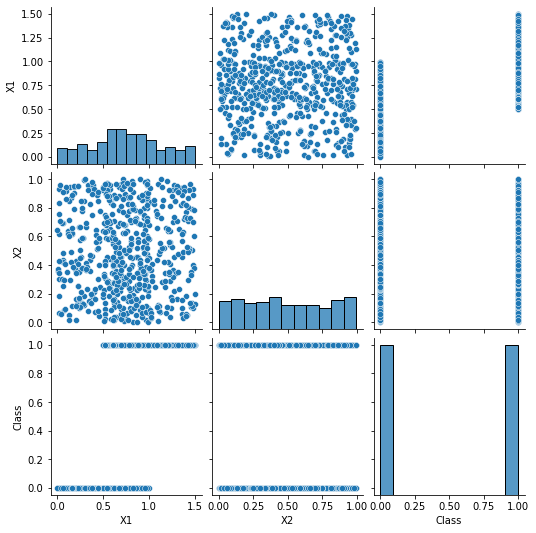

Dataset 1 Class A Histogram

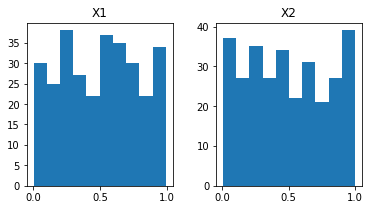

Dataset 1 Class B Histogram

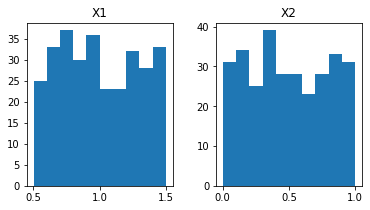

Dataset 2 Statistics:

,X1,X2,Class
count,600.000000,600.000000,600.000000
mean,0.473725,0.495420,0.500000
std,0.951497,0.576779,0.500417
min,-2.528299,-0.856548,0.000000
25%,-0.152288,0.018048,0.000000
50%,0.460075,0.515972,0.500000
75%,1.121963,0.973737,1.000000
max,3.290265,1.786571,1.000000


Dataset 2 Class A Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,-0.020282,0.014036,0.0
std,0.827376,0.326269,0.0
min,-2.528299,-0.856548,0.0
25%,-0.548454,-0.183206,0.0
50%,0.015693,0.018753,0.0
75%,0.507965,0.200593,0.0
max,2.002337,0.941891,0.0


Dataset 2 Class B Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,0.967732,0.976804,1.0
std,0.799657,0.308217,0.0
min,-1.352680,-0.090780,1.0
25%,0.407415,0.765874,1.0
50%,0.952037,0.974333,1.0
75%,1.436953,1.193200,1.0
max,3.290265,1.786571,1.0


Dataset 2 Class A Covariance

,X1,X2
X1,0.684551,0.189066
X2,0.189066,0.106452


Dataset 2 Class B Covariance:

,X1,X2
X1,0.639451,0.175940
X2,0.175940,0.094998


Dataset 2 pairplot

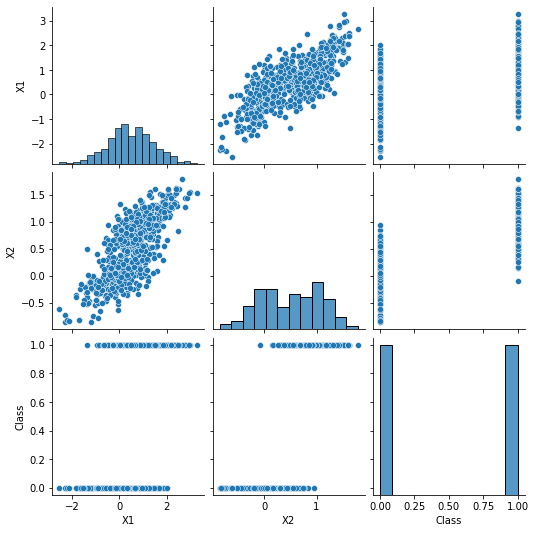

Dataset 2 Class A Histogram

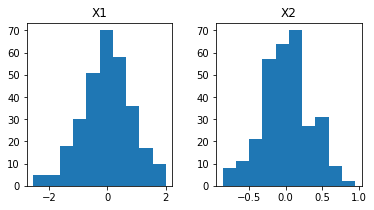

Dataset 2 Class B Histogram

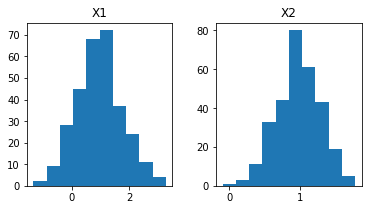

Dataset 3 Statistics:

,X1,X2,Class
count,600.000000,600.000000,600.000000
mean,0.477786,2.196081,0.500000
std,3.822859,4.382142,0.500417
min,-15.230715,-10.529514,0.000000
25%,-1.234267,-0.722251,0.000000
50%,0.802649,1.376222,0.500000
75%,2.632443,4.799941,1.000000
max,12.062268,20.120173,1.000000


Dataset 3 Class A Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,-0.122183,0.136718,0.0
std,4.984191,2.455616,0.0
min,-15.230715,-6.575621,0.0
25%,-3.303942,-1.457636,0.0
50%,0.094533,0.121755,0.0
75%,3.060031,1.661628,0.0
max,12.062268,6.951659,0.0


Dataset 3 Class B Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,1.077754,4.255444,1.0
std,1.926884,4.891850,0.0
min,-4.518710,-10.529514,1.0
25%,-0.052898,0.867808,1.0
50%,1.115572,4.123293,1.0
75%,2.427915,7.586508,1.0
max,6.669109,20.120173,1.0


Dataset 3 Class A Covariance

,X1,X2
X1,24.842163,6.922880
X2,6.922880,6.030051


Dataset 3 Class B Covariance:

,X1,X2
X1,3.712883,-2.664862
X2,-2.664862,23.930196


Dataset 3 pairplot

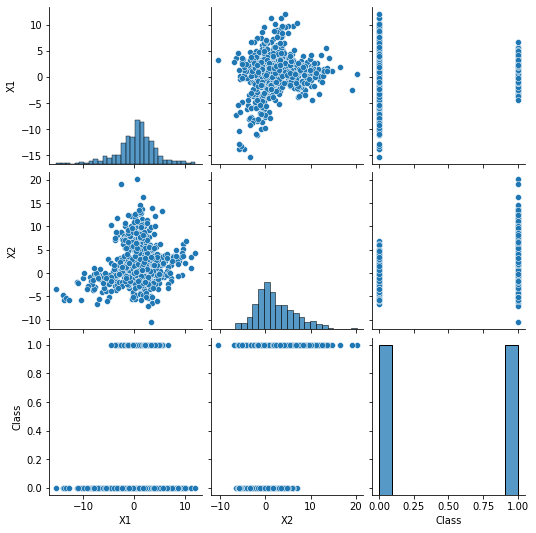

Dataset 3 Class A Histogram

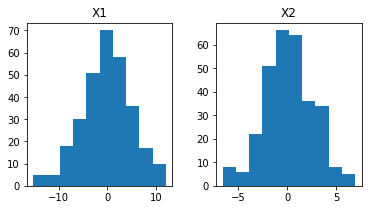

Dataset 3 Class B Histogram

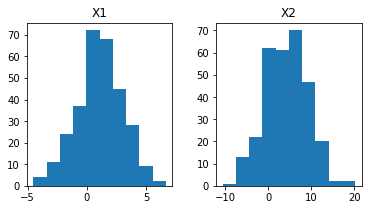

In [ ]:
#STEP 3

#STUDENT CODE - Insert code to explore the dataset here
#---------------------------------------------
def data_analysis(df, title):
    display(md(title + ' Statistics:'))
    display(df.describe())

    display(md(title + ' Class A Statistics:'))
    display(df[df['Class'] == 0].describe())

    display(md(title + ' Class B Statistics:'))
    display(df[df['Class'] == 1].describe())

    display(md(title + ' Class A Covariance'))
    display(df.loc[df['Class'] == 0,['X1', 'X2']].cov())

    display(md(title + ' Class B Covariance:'))
    display(df.loc[df['Class'] == 1,['X1', 'X2']].cov())

    display(md(title + ' pairplot'))
    sns.pairplot(df)
    plt.show()

    display(md(title + ' Class A Histogram'))
    df[df['Class'] == 0][['X1', 'X2']].hist(grid=False, figsize=(6,3))
    plt.show()

    display(md(title + ' Class B Histogram'))
    df[df['Class'] == 1][['X1', 'X2']].hist(grid=False, figsize=(6,3))
    plt.show()

data_analysis(df1, 'Dataset 1')
data_analysis(df2, 'Dataset 2')
data_analysis(df3, 'Dataset 3')
#---------------------------------------------

STEP_3_COMPLETE = True

#### STEP 4: discuss datasets

Discuss each dataset. 

- What do you notice about the distribution of the data? 
- What can you say about the covariance of the two classes? 
- Within each class, are the variances for each feature equal? 
- Between classes, are the variances of a single feature equal? 
- How well are the classes separated? 
- For each dataset, which predictor algorithm (logistic regression, LDA, or QDA) do you think will perform best? Why?

##### Dataset 1

<font color="green">Student Answer</font>

##### Dataset 2

<font color="green">Student Answer</font>

##### Dataset 3

<font color="green">Student Answer</font>

In [ ]:
STEP_4_COMPLETE = True

### Prepare Data for Training

#### NO STEP: establish phase data

In [ ]:
# Do not change the following code that splits each dataset into two phases of data

phase1_size = 400
seed = 623

from contextlib import suppress
with suppress(NameError):
    # phase1_1 = df1
    # phase1_2 = df2
    # phase1_3 = df3
    phase1_1, phase2_1 = train_test_split(df1, train_size=phase1_size, random_state=seed, stratify=df1['Class'])
    phase1_2, phase2_2 = train_test_split(df2, train_size=phase1_size, random_state=seed, stratify=df2['Class'])
    phase1_3, phase2_3 = train_test_split(df3, train_size=phase1_size, random_state=seed, stratify=df3['Class'])

#### STEP 5: function split

In this step, you'll generate a function with the signature `split(data, train_size = 0.5, random_state = 42)`.

This function will take in a single dataset `data`, the percent of data that will be included in the training set `train_size`, defaulting to 0.5, and a random seed `random_state`, defaulting to 42. and return 2 `pandas` DataFrames and 2 `pandas` Series:
- 1st DataFrame: training X values
- 2nd DataFrame: testing X values
- 1st Series: training y values
- 2nd Series: testing y values

The default values assume 50% of each dataset will be used for training and 50% will be used for testing. Furthermore, the class balance of the original dataset should be preserved in the phase1 and phase2 datasets. You should consider the use of the `sklearn.model_selection` `train_test_split` function.

FAQ:
- Why are we creating a `split` function when we can just call `train_test_split` directly?

  The answer to this question lies at the heart of a software design principal: don't repeat yourself, or DRY. The `train_test_split` has several configuration options that you'll want to use, including a `random_state` (for reapetability purposes) and `train_size` (for the size of your training data), along with others. You'll also need to do array slicing to split the X and y data. Rather than including these in every call you make to the `train_test_split` function, you can write these once, and then call it everywhere.

In [ ]:
#STEP 5

#STUDENT CODE - Insert code to create the split function
#---------------------------------------------
def split(data, train_size = 0.5, random_state = 42):
    X = data.loc[:,['X1', 'X2']]
    y = data['Class']
    return train_test_split(X, y, train_size=train_size, random_state=random_state, stratify=y)
#---------------------------------------------

STEP_5_COMPLETE = True

#### STEP 6: split train/test data

Use the `split` function you created in STEP 5 to generate 12 variables (3 function calls, 4 variables per function call):
- X\_train_$\phi$
- X\_test_$\phi$
- y\_train_$\phi$
- y\_test_$\phi$

Where $\phi \in \{1,2,3\}$ represents the dataset. For example, `X_train_1` represents the portion of dataset2 used in phase1.

__IMPORTANT: You should not use the `df1`, `df2`, `df3` datasets you created in STEP 1. Instead, you will use `phase1_1`, `phase1_2`, and `phase1_3` dataset created for you just before STEP 5.__

In [ ]:
#STEP 6

#STUDENT CODE - Insert code to generate the 12 variables consisting of the
# X and y values for each phase and each dataset
#---------------------------------------------
X_train_1, X_test_1, y_train_1, y_test_1 = split(phase1_1)
X_train_2, X_test_2, y_train_2, y_test_2 = split(phase1_2)
X_train_3, X_test_3, y_train_3, y_test_3 = split(phase1_3)
#---------------------------------------------

STEP_6_COMPLETE = True

### Train Data

#### STEP 7: function train

Create a function `train_classifiers(X, y)` where `X` is a `pandas` `DataFrame` of feature inputs and `y` is a `pandas` `Series` of target values.

The `train_classifiers` function will fit three models, logistic regression, LDA, and QDA, to the model, and return a Python dictionary such that:

- the value of the key 'log' is the logistic regression model
- the value of the key 'lda' is the LDA model
- the value of the key 'qda' is the QDA model

In [ ]:
#STEP 7

#STUDENT CODE - Insert code to create the train_classifiers function
#---------------------------------------------

def train_classifiers(X, y):
    log_reg = LogisticRegression()
    log_reg.fit(X, y)

    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X, y)

    return {'log': log_reg, 'lda': lda, 'qda': qda}
#---------------------------------------------

STEP_7_COMPLETE = True

#### STEP 8: train classifiers

Using the `train_classifiers` function you created in STEP 7, create three dictionaries, `models1`, `models2`, and `models3`, which are dictionaries of models (logistic regression, LDA, and QDA) for `dataset1`, `dataset2`, and `dataset3`, respectively.

In [ ]:
#STEP 8

#STUDENT CODE - Insert code to create the train_classifiers function
#---------------------------------------------

models1 = train_classifiers(X_train_1, y_train_1)
models2 = train_classifiers(X_train_2, y_train_2)
models3 = train_classifiers(X_train_3, y_train_3)
#---------------------------------------------

STEP_8_COMPLETE = True

### Evaluate Models

Having created machine learning models for each dataset in STEP 8, we will now use those models to evaluate their performance and examine the effect of candidate threshold values.

#### STEP 9: function predict

Create a function `predict_probabilities(models, X)` which takes in a dictionary of models that you created in STEPs 8 and 9, `models`, and a `DataFrame` `X` containing observations. The function will return a dictionary where the keys will correspond to the keys of the `models` input variable. The values of the dictionary are arrays of predicted probabilities that an observation is a member of Class 1.

For example, assuming `predicts` is assigned the return value of `predict_probabilities`, `predicts['log']` is an array of probabilities that the logistic regression model of the `models` input parameter predicts each input of X is a member of Class 1. 

Hints:
- Take a look at the `sklearn` `predict_proba(X)` function.
- Note the above function returns a 2d array with the first value in each row indicating the probability the observation belongs to Class 0 with the second value being the probability the observation belongs to Class 1.

In [ ]:
#STEP 9

#STUDENT CODE - Insert code to create the train_classifiers function
#---------------------------------------------
def predict_probabilities(models, X):
    predicts = {}
    for key, model in models.items():
        predicts[key] = model.predict_proba(X)[:,1]
    return predicts
#---------------------------------------------

STEP_9_COMPLETE = True

#### STEP 10: predict probabilities

Using the `predict_probabilities` function you created in STEP 9, create 3 Python dictionaries, `predicts1`, `predicts2`, and `predicts3` using the models you created in STEP 8 to predict the probabilities that observations in the Phase 1 __test data__ are in Class 1.

For example, `predicts2` will be a dictionary such that `predicts2['lda']` is an array of probabilities that the members of the Phase 1 test data are in Class 1 using the LDA model that was fitted on the training data.

In [ ]:
#STEP 10

#STUDENT CODE - Insert code to create the generate the 
# probability predictions for the test data
#---------------------------------------------
predicts1 = predict_probabilities(models1, X_test_1)
predicts2 = predict_probabilities(models2, X_test_2)
predicts3 = predict_probabilities(models3, X_test_3)
#---------------------------------------------
# print(predicts1)
STEP_10_COMPLETE = True

#### STEP 11: function threshold_metrics

The model "threshold" is a tunable parameter for the logistic regression, LDA, and QDA machine learning algorithms. These binary classifiers produce a probability that a given observation is a member of Class 0 or Class 1. The threshold parameter is a scalar value that is used to map probabilities to classes. Probabilities greater than the threshold are assigned to Class 1. By way of trivial examples, a threshold value of 0.0 results in nearly all observations being classified as Class 1, whereas as a threshold value of 1.0 results in no observations being classified as Class 1.

In this step, you will create `threshold_metrics(y_true, y_probs, threshold)` where `y_true` and `y_probs` are `numpy` `ndarray`s representing the true class values and model's prediction probabilities, respectively. The `threshold` is a Python `list` of candidate thresholds for evaluation.

The function `threshold_metrics` will return a dataframe with $m$ rows and 10 columns, where $m$ is the length of the `thresholds` list. The columns will be:
- Threshold
- True Positive
- True Negative
- False Negative
- Recall
- Precision
- False Positive Rate
- Accuracy
- F-measure

Each row will include one of the candidate threshold from the `thresholds` list and the model's performance metrics when that threshold value is used to determine the class. See the following example of sample inputs and expected `DataFrame` output.

Sample true values:
```
[0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
```

Sample model probabilities:
```
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]
```

And thresholds:
```
[0.5 0.75]
```

`DataFrame` yielded by `threshold_metrics` function:
```
   Threshold  True Positive  False Positive  True Negative  False Negative       Recall  Precision  False Positive Rate  Accuracy  F-measure
0       0.50            3.0             3.0            4.0             0.0     1.000000        0.5             0.000000       0.7   0.666667   
1       0.75            2.0             0.0            7.0             1.0     0.666667        1.0             0.333333       0.9   0.800000  
```



In [ ]:
#STEP 11

#STUDENT CODE - Insert code to create the threshold_metrics function
#---------------------------------------------
def threshold_metrics(y_true, y_probs, thresholds):
    df = pd.DataFrame(columns=['Threshold', 'True Positive', 'False Positive', 'True Negative', 'False Negative', 'Recall', 'Precision', 'False Positive Rate', 'Accuracy', 'F-measure'])
    for key, threshold in enumerate(thresholds):
        predictions = y_probs >= threshold

        with np.errstate(divide='ignore', invalid='ignore'): # suppress divide by zero error
            true_pos = (predictions & (y_true == 1.0)).sum()
            false_pos = (predictions & (y_true != 1.0)).sum()
            true_neg = (~predictions & (y_true != 1.0)).sum()
            false_neg = (~predictions & (y_true == 1.0)).sum()
            recall = true_pos / (true_pos + false_neg)
            precision = true_pos / (true_pos + false_pos)
            fpr = false_pos / (false_pos + true_neg)
            accuracy = (true_pos + true_neg) / len(y_true)
            f_measure = 2 * (precision * recall) / (precision + recall)
        
        df.loc[len(df.index)] = [threshold, true_pos, false_pos, true_neg, false_neg, recall, precision, fpr, accuracy, f_measure]
    
    return df
#---------------------------------------------

STEP_11_COMPLETE = True

#### EXTRA: function display_threshold_metrics

You may use the following code to test threshold_metrics

In [ ]:
### Code to generate sample data for STEP 11 instructions
DEBUG = True # this DEBUG flag allows you to run this code only when debugging
if DEBUG:
    np.random.seed(42)
    y_probs = np.random.random(10)
    truths = np.around(np.random.random(10))
    thresholds = [0.5, 0.75]

    vals = threshold_metrics(truths, y_probs, thresholds)

    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print('Truth values: ', truths)
        print('Predicted probabilities: ', y_probs)
        print('Thresholds: ', thresholds)
        display(vals)

Truth values:  [0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
Predicted probabilities:  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]
Thresholds:  [0.5, 0.75]


,Threshold,True Positive,False Positive,True Negative,False Negative,Recall,Precision,False Positive Rate,Accuracy,F-measure
0,0.50,3.0,3.0,4.0,0.0,1.000000,0.5,0.428571,0.7,0.666667
1,0.75,2.0,0.0,7.0,1.0,0.666667,1.0,0.000000,0.9,0.800000


#### STEP 12: function thresholds_argmax 

In this step, you'll create a function, `thresholds_argmax(y, predicts)` which receives parameters `y`, an array of truth values, and `predicts`, a dictionary of models and arrays of probabilities that observations belong to Class 1.

This function will return the threshold data for the thresholds where each of the following metrics are maximized: Accuracy, Precision, Recall, and F-measure.

For example, if `thresholds1` contains the return value from the function applied to Dataset 1, `thresholds1['log']['Accuracy']` will contain the threshold that yields the best accuracy of the logistic regression model along with all the other metrics returned by threshold data, for example:

```
Threshold                0.298085
True Positive          137.000000
False Positive          60.000000
True Negative           90.000000
False Negative          13.000000
Recall                   0.913333
Precision                0.695431
False Positive Rate      0.086667
Accuracy                 0.756667
F-measure                0.789625
Name: 74, dtype: float64
```

In this way, `thresholds1['log']['Accuracy']['Threshold']` is the threshold value where accuracy is maximized using a logistic regression model on Dataset 1 and `tresholds1['log']['Accuracy']['Accuracy']` is the highest accuracy.

Hints:
- The `roc_curve` method of the `sklearn.metrics` pacakage takes in truth values and probabilities and returns the false positive rate, true positive rate, and thresholds for evaluation. You may find the thresholds returned by this function useful for further evaluation to find the threshold values that maximize the metrics of interest.
- The `numpy` `argmax(a)` function returns the index of the array `a` of the maximum value of `a`.
- Thus, `data.iloc[np.argmax(data[col])]` will return the row where `data[col]` is maximized.
- Your `threshold_metrics` function may raise errors or warnings if a candidate threshold is selected such that both precision and recall are 0, since the sum of these is the denominator of F-measure. To suppress these warnings, you can call `threshold_metrics` in the following context: `with np.errstate(divide='ignore', invalid='ignore'):` 

In [ ]:
#STEP 12

#STUDENT CODE - Insert code to create the thresholds_argmax function
#---------------------------------------------
def thresholds_argmax(y, predicts):
    threshold_max = {}
    columns = ['Accuracy', 'Precision', 'Recall', 'F-measure']
    for method, probs in predicts.items():
        _, _, thresholds = roc_curve(y, predicts[method])

        thresholds = np.insert(thresholds, 0, 0)
        # thresholds.append(1.0)

        with np.errstate(divide='ignore', invalid='ignore'): # suppress divide by zero error
            data = threshold_metrics(y, predicts[method], thresholds)

        # with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        #     if method == 'log':
        #         print(data[['False Positive Rate', 'Recall', 'Threshold']])
        threshold_max_dict = {col: data.iloc[np.argmax(data[col])] for col in columns}
        
        threshold_max[method] = threshold_max_dict

    return threshold_max
#---------------------------------------------

STEP_12_COMPLETE = True

#### EXTRA: function display_thresholds_argmax

These functions are provided to display the threshold data created by `thresholds_argmax`. You may also use `display_thresholds_argmax` to analyze any arbitrary set of thresholds elsewhere.

In [ ]:

def display_thresholds_argmax(y, predicts, title):
    vals = thresholds_argmax(y, predicts)

    for method, threshold_metrics in vals.items():
        display(md(title + ' ' + method.upper()))

        df = pd.DataFrame()
        for metric, values in threshold_metrics.items():
            df = df.append(values.to_frame().T)

        df['Metric'] = threshold_metrics.keys()
        df = df.set_index('Metric', drop=True)
        df.index.name = None
        display(df)

from contextlib import suppress
with suppress(NameError):
    display_thresholds_argmax(y_test_1, predicts1, 'Dataset 1')
    display_thresholds_argmax(y_test_2, predicts2, 'Dataset 2')
    display_thresholds_argmax(y_test_3, predicts3, 'Dataset 3')


Dataset 1 LOG

,Threshold,True Positive,False Positive,True Negative,False Negative,Recall,Precision,False Positive Rate,Accuracy,F-measure
Accuracy,0.575610,67.0,13.0,87.0,33.0,0.67,0.837500,0.13,0.770,0.744444
Precision,0.943026,1.0,0.0,100.0,99.0,0.01,1.000000,0.00,0.505,0.019802
Recall,0.000000,100.0,100.0,0.0,0.0,1.00,0.500000,1.00,0.500,0.666667
F-measure,0.296034,98.0,45.0,55.0,2.0,0.98,0.685315,0.45,0.765,0.806584


Dataset 1 LDA

,Threshold,True Positive,False Positive,True Negative,False Negative,Recall,Precision,False Positive Rate,Accuracy,F-measure
Accuracy,0.564781,71.0,16.0,84.0,29.0,0.71,0.816092,0.16,0.775,0.759358
Precision,0.984736,1.0,0.0,100.0,99.0,0.01,1.000000,0.00,0.505,0.019802
Recall,0.000000,100.0,100.0,0.0,0.0,1.00,0.500000,1.00,0.500,0.666667
F-measure,0.214917,98.0,45.0,55.0,2.0,0.98,0.685315,0.45,0.765,0.806584


Dataset 1 QDA

,Threshold,True Positive,False Positive,True Negative,False Negative,Recall,Precision,False Positive Rate,Accuracy,F-measure
Accuracy,0.541241,72.0,17.0,83.0,28.0,0.72,0.808989,0.17,0.775,0.761905
Precision,0.988194,1.0,0.0,100.0,99.0,0.01,1.000000,0.00,0.505,0.019802
Recall,0.000000,100.0,100.0,0.0,0.0,1.00,0.500000,1.00,0.500,0.666667
F-measure,0.218664,98.0,45.0,55.0,2.0,0.98,0.685315,0.45,0.765,0.806584


Dataset 2 LOG

,Threshold,True Positive,False Positive,True Negative,False Negative,Recall,Precision,False Positive Rate,Accuracy,F-measure
Accuracy,0.610391,94.0,2.0,98.0,6.0,0.94,0.979167,0.02,0.960,0.959184
Precision,0.995055,1.0,0.0,100.0,99.0,0.01,1.000000,0.00,0.505,0.019802
Recall,0.000000,100.0,100.0,0.0,0.0,1.00,0.500000,1.00,0.500,0.666667
F-measure,0.534007,96.0,4.0,96.0,4.0,0.96,0.960000,0.04,0.960,0.960000


Dataset 2 LDA

,Threshold,True Positive,False Positive,True Negative,False Negative,Recall,Precision,False Positive Rate,Accuracy,F-measure
Accuracy,0.611047,95.0,3.0,97.0,5.0,0.95,0.969388,0.03,0.960,0.959596
Precision,0.999996,1.0,0.0,100.0,99.0,0.01,1.000000,0.00,0.505,0.019802
Recall,0.000000,100.0,100.0,0.0,0.0,1.00,0.500000,1.00,0.500,0.666667
F-measure,0.611047,95.0,3.0,97.0,5.0,0.95,0.969388,0.03,0.960,0.959596


Dataset 2 QDA

,Threshold,True Positive,False Positive,True Negative,False Negative,Recall,Precision,False Positive Rate,Accuracy,F-measure
Accuracy,0.568096,95.0,3.0,97.0,5.0,0.95,0.969388,0.03,0.960,0.959596
Precision,0.999978,1.0,0.0,100.0,99.0,0.01,1.000000,0.00,0.505,0.019802
Recall,0.000000,100.0,100.0,0.0,0.0,1.00,0.500000,1.00,0.500,0.666667
F-measure,0.568096,95.0,3.0,97.0,5.0,0.95,0.969388,0.03,0.960,0.959596


Dataset 3 LOG

,Threshold,True Positive,False Positive,True Negative,False Negative,Recall,Precision,False Positive Rate,Accuracy,F-measure
Accuracy,0.513870,63.0,22.0,78.0,37.0,0.63,0.741176,0.22,0.705,0.681081
Precision,0.995740,1.0,0.0,100.0,99.0,0.01,1.000000,0.00,0.505,0.019802
Recall,0.000000,100.0,100.0,0.0,0.0,1.00,0.500000,1.00,0.500,0.666667
F-measure,0.440309,70.0,30.0,70.0,30.0,0.70,0.700000,0.30,0.700,0.700000


Dataset 3 LDA

,Threshold,True Positive,False Positive,True Negative,False Negative,Recall,Precision,False Positive Rate,Accuracy,F-measure
Accuracy,0.497874,63.0,22.0,78.0,37.0,0.63,0.741176,0.22,0.705,0.681081
Precision,0.995351,1.0,0.0,100.0,99.0,0.01,1.000000,0.00,0.505,0.019802
Recall,0.000000,100.0,100.0,0.0,0.0,1.00,0.500000,1.00,0.500,0.666667
F-measure,0.219134,92.0,70.0,30.0,8.0,0.92,0.567901,0.70,0.610,0.702290


Dataset 3 QDA

,Threshold,True Positive,False Positive,True Negative,False Negative,Recall,Precision,False Positive Rate,Accuracy,F-measure
Accuracy,0.435806,84.0,21.0,79.0,16.0,0.84,0.800000,0.21,0.815,0.819512
Precision,1.000000,1.0,0.0,100.0,99.0,0.01,1.000000,0.00,0.505,0.019802
Recall,0.000000,100.0,100.0,0.0,0.0,1.00,0.500000,1.00,0.500,0.666667
F-measure,0.434001,85.0,22.0,78.0,15.0,0.85,0.794393,0.22,0.815,0.821256


#### EXTRA: functions for numerical and visual analysis

These functions may optionally be used to complete STEP 18

In [ ]:
def display_thresholds(y, predicts, method):
    _, _, thresholds = roc_curve(y, predicts[method])
    
    display(md('Thresholds of %s model' %(method.upper())))
    with pd.option_context('display.max_rows', None, 'display.max_columns', None): # show all rows and columns
        display(threshold_metrics(y, predicts[method], thresholds))


def plot_threshold_on_roc_curve(y, predicts, selection):
    vals = threshold_metrics(y, predicts[selection['method']], [selection['threshold']])
    display(md('%s model threshold = %.2f' %(selection['method'].upper(), selection['threshold'])))
    display(vals)
    vals = np.squeeze(vals)
    plt.plot([-0.05, vals['False Positive Rate']], [vals['Recall'], vals['Recall']], '--r', linewidth=1, label='%s threshold = %.2f' %(selection['method'].upper(), selection['threshold']))
    plt.plot([vals['False Positive Rate'], vals['False Positive Rate']], [-0.5, vals['Recall']], '--r', linewidth=1)


def plot_threshold_on_precision_recall_curve(y, predicts, selection):
    vals = threshold_metrics(y, predicts[selection['method']], [selection['threshold']])
    display(md('%s model threshold = %.2f' %(selection['method'].upper(), selection['threshold'])))
    display(vals)
    vals = np.squeeze(vals)
    plt.plot([-0.05, vals['Threshold']],[max(vals["Precision"], vals["Recall"]), max(vals["Precision"], vals["Recall"])], '--r', linewidth=1, label='%s threshold = %.2f' %(selection['method'].upper(), selection['threshold']))
    plt.plot([-0.05, vals['Threshold']],[min(vals["Precision"], vals["Recall"]), min(vals["Precision"], vals["Recall"])], '--r', linewidth=1)
    plt.plot([vals['Threshold'], vals['Threshold']], [-0.05, max(vals["Precision"], vals["Recall"])], '--r', linewidth=1)


def plot_threshold_on_precision_vs_recall_curve(y, predicts, selection):
    vals = threshold_metrics(y, predicts[selection['method']], [selection['threshold']])
    display(md('%s model threshold = %.2f' %(selection['method'].upper(), selection['threshold'])))
    display(vals)
    vals = np.squeeze(vals)
    plt.plot([-0.05, vals['Recall']],[vals['Precision'],vals['Precision']], '--r', linewidth=1, label='%s threshold = %.2f' %(selection['method'].upper(), selection['threshold']))
    plt.plot([vals['Recall'], vals['Recall']], [-0.05, vals['Precision']], '--r', linewidth=1)



def set_plot_size(width=12, height=9):
    plt.figure(figsize=(width, height))


def set_plot_defaults(title, **kwargs):
    legend_loc = kwargs.get('legend_loc', 'lower left')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.grid(True)
    plt.title(title)
    plt.legend(loc=legend_loc)





#### STEP 13: confusion matrices

Print confusion matrices for each of the threshold values that maximize the metrics of interest noted in STEP 11 (Accuracy, Precision, Recall, and F-Measure). Each confusion matrix should have a text header indicating which metric is being maximized and what the threshold value is. See below for an example.

Hints:
- In total, you will create 36 confusion matrices (3 datasets with 3 models each, and 4 metrics).
- You may use the `confusion_matrix` function of the `sklearn.metrics` package, or you may calculate the values yourself.
- You can take advantage of broadcasting to manipulate a probabilities array into the resulting predictions. For example, if the threshold value is `0.3`, and you have a `predicts2` dictionary, `predicts2['qda'] > 0.3` will create an array of True and False values referring to whether the observation is predicted to belong in Class 1, based on the threshold value.
- Storing values in a DataFrame, then displaying that DataFrame, can be a convenient way of displaying tables. 
- A good design practice may involve creating two functions:
  - `display_confusion_matrix(confusion_data)` which takes in a 2x2 array, adds index and column headers, and then displays it
  - `generate_confusion_matrices(y, predicts, title)` which will be called three times, once for each dataset. It will generate confusion table data and call `display_confusion_matrix` for every model and metric of interest
- Here is an example of what the confusion matrices for the logistic regression model applied to Dataset 1 might look like.

<img src='https://github.com/afit-csce623-master/template-hw2/blob/main/images/dataset1_log_conf_matrix.png?raw=1' />

In [ ]:
# STEP 13

#STUDENT CODE - Insert code to create the threshold_metrics function
#---------------------------------------------
def display_confusion_matrix(confusion_data):
    np.set_printoptions(2)
    confusion_table = pd.DataFrame(confusion_data, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
    display(confusion_table)
    np.set_printoptions()

def generate_confusion_matrices(y, predicts, title):

    display(md('\\'))
    display(md('__%s__ ' %title))

    thresholds = thresholds_argmax(y, predicts)
    for key, value in predicts.items():

        display(md('\\'))
        display(md('__Model:__ ' + key.upper()))

        for metric in thresholds[key]:
            threshold = thresholds[key][metric]['Threshold']
            metric_value = thresholds[key][metric][metric]
            display(md('Threshold for maximum %s (%.3f): %.4f' %(metric, metric_value, threshold)))

            confusion_data = confusion_matrix(y_train_1, predicts1[key] > threshold)
            display_confusion_matrix(confusion_data)

generate_confusion_matrices(y_test_1, predicts1, 'Dataset 1')
generate_confusion_matrices(y_test_2, predicts2, 'Dataset 2')
generate_confusion_matrices(y_test_3, predicts2, 'Dataset 3')

#---------------------------------------------

STEP_13_COMPLETE = True

\

__Dataset 1__ 

\

__Model:__ LOG

Threshold for maximum Accuracy (0.770): 0.5756

,Predicted 0,Predicted 1
True 0,55,45
True 1,66,34


Threshold for maximum Precision (1.000): 0.9430

,Predicted 0,Predicted 1
True 0,100,0
True 1,100,0


Threshold for maximum Recall (1.000): 0.0000

,Predicted 0,Predicted 1
True 0,0,100
True 1,0,100


Threshold for maximum F-measure (0.807): 0.2960

,Predicted 0,Predicted 1
True 0,30,70
True 1,28,72


\

__Model:__ LDA

Threshold for maximum Accuracy (0.775): 0.5648

,Predicted 0,Predicted 1
True 0,54,46
True 1,60,40


Threshold for maximum Precision (1.000): 0.9847

,Predicted 0,Predicted 1
True 0,100,0
True 1,100,0


Threshold for maximum Recall (1.000): 0.0000

,Predicted 0,Predicted 1
True 0,0,100
True 1,0,100


Threshold for maximum F-measure (0.807): 0.2149

,Predicted 0,Predicted 1
True 0,30,70
True 1,28,72


\

__Model:__ QDA

Threshold for maximum Accuracy (0.775): 0.5412

,Predicted 0,Predicted 1
True 0,53,47
True 1,59,41


Threshold for maximum Precision (1.000): 0.9882

,Predicted 0,Predicted 1
True 0,100,0
True 1,100,0


Threshold for maximum Recall (1.000): 0.0000

,Predicted 0,Predicted 1
True 0,0,100
True 1,0,100


Threshold for maximum F-measure (0.807): 0.2187

,Predicted 0,Predicted 1
True 0,30,70
True 1,28,72


\

__Dataset 2__ 

\

__Model:__ LOG

Threshold for maximum Accuracy (0.960): 0.6104

,Predicted 0,Predicted 1
True 0,57,43
True 1,68,32


Threshold for maximum Precision (1.000): 0.9951

,Predicted 0,Predicted 1
True 0,100,0
True 1,100,0


Threshold for maximum Recall (1.000): 0.0000

,Predicted 0,Predicted 1
True 0,0,100
True 1,0,100


Threshold for maximum F-measure (0.960): 0.5340

,Predicted 0,Predicted 1
True 0,52,48
True 1,58,42


\

__Model:__ LDA

Threshold for maximum Accuracy (0.960): 0.6110

,Predicted 0,Predicted 1
True 0,55,45
True 1,65,35


Threshold for maximum Precision (1.000): 1.0000

,Predicted 0,Predicted 1
True 0,100,0
True 1,100,0


Threshold for maximum Recall (1.000): 0.0000

,Predicted 0,Predicted 1
True 0,0,100
True 1,0,100


Threshold for maximum F-measure (0.960): 0.6110

,Predicted 0,Predicted 1
True 0,55,45
True 1,65,35


\

__Model:__ QDA

Threshold for maximum Accuracy (0.960): 0.5681

,Predicted 0,Predicted 1
True 0,54,46
True 1,62,38


Threshold for maximum Precision (1.000): 1.0000

,Predicted 0,Predicted 1
True 0,100,0
True 1,100,0


Threshold for maximum Recall (1.000): 0.0000

,Predicted 0,Predicted 1
True 0,0,100
True 1,0,100


Threshold for maximum F-measure (0.960): 0.5681

,Predicted 0,Predicted 1
True 0,54,46
True 1,62,38


\

__Dataset 3__ 

\

__Model:__ LOG

Threshold for maximum Accuracy (0.960): 0.6104

,Predicted 0,Predicted 1
True 0,57,43
True 1,68,32


Threshold for maximum Precision (1.000): 0.9951

,Predicted 0,Predicted 1
True 0,100,0
True 1,100,0


Threshold for maximum Recall (1.000): 0.0000

,Predicted 0,Predicted 1
True 0,0,100
True 1,0,100


Threshold for maximum F-measure (0.960): 0.5340

,Predicted 0,Predicted 1
True 0,52,48
True 1,58,42


\

__Model:__ LDA

Threshold for maximum Accuracy (0.960): 0.6110

,Predicted 0,Predicted 1
True 0,55,45
True 1,65,35


Threshold for maximum Precision (1.000): 1.0000

,Predicted 0,Predicted 1
True 0,100,0
True 1,100,0


Threshold for maximum Recall (1.000): 0.0000

,Predicted 0,Predicted 1
True 0,0,100
True 1,0,100


Threshold for maximum F-measure (0.960): 0.6110

,Predicted 0,Predicted 1
True 0,55,45
True 1,65,35


\

__Model:__ QDA

Threshold for maximum Accuracy (0.960): 0.5681

,Predicted 0,Predicted 1
True 0,54,46
True 1,62,38


Threshold for maximum Precision (1.000): 1.0000

,Predicted 0,Predicted 1
True 0,100,0
True 1,100,0


Threshold for maximum Recall (1.000): 0.0000

,Predicted 0,Predicted 1
True 0,0,100
True 1,0,100


Threshold for maximum F-measure (0.960): 0.5681

,Predicted 0,Predicted 1
True 0,54,46
True 1,62,38


#### STEP 14: plot roc curves

For each dataset, plot the Receiver Operating Characteristics (ROC) curve for each classifier. You'll plot all three classifiers in a different color on the same plot. Include the AUC calculations with your plot

Annotate each plot to represent the points of maximum accuracy, precision, recall, and F-measure for each model. OPTIONAL: use the Python package `adjustText` to automatically displace the labels and to add arrows to the locations of interest along the ROC curves. Moreover, these [examples](https://adjusttext.readthedocs.io/en/latest/Examples.html) may also be helpful. Our adjust_text parameters closely resemble the first of the "Difficult examples" on this page, though we increased the values for `expand_text` and `expand_points`.

Hints:
- Consider a single function with the signature `plot_roc_curves(y, predicts, title)` which will be called three times for each dataset. `y` is your test set y-values, `predicts` is the dictionary you created in STEP 10, and `title` is the title of the plot. Thus, `plot_roc_curves` will create a single plot with the roc_curve of three models for that dataset. You would call `plot_roc_curves` three times, once for each dataset.
- You may use either or both the `sklearn.metrics` `plot_roc_curve` and `roc_curve`. If you choose to use `plot_roc_curve` you'll need to store the plt object to overlay subsequent curves. `plot_roc_curve` automatically calculates and displays the `auc` metric. The instructor's solution does not use `plot_roc_curve`.
- Instead of generating `fpr`, `tpr`, and `threshold` values from `roc_curve`, you may alternatively create your own array of threshold values using `linspace`. You would then use the `threshold_metrics` function you created in STEP 11 on the array and extract the relevant metrics for your plot. This is the method the instructor's solution uses, as it produces a smoother plot (we used 100 intervals).
- You may use the `roc_auc_score` function from `sklearn.metrics`
- Pages 93-99 of the _HOML_ text may provide helpful Python code examples.
- Here is an example plot from the instructor's soluton
<img src='https://github.com/afit-csce623-master/template-hw2/blob/main/images/dataset2_roc_plot.png?raw=1' />

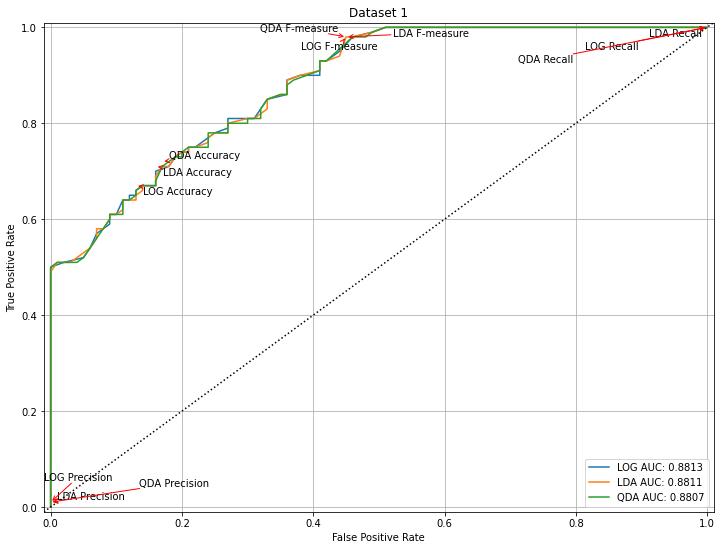

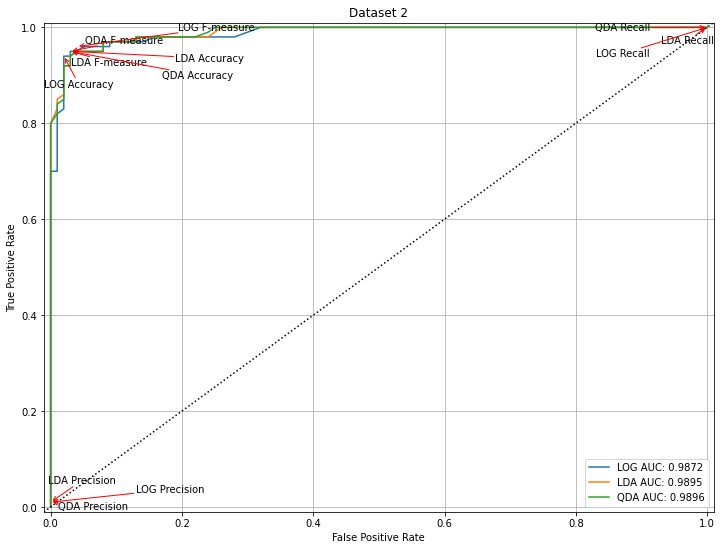

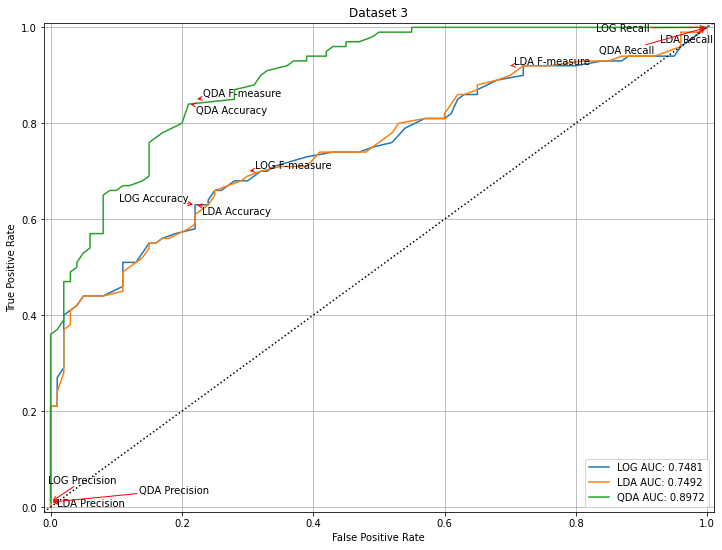

In [ ]:
#STEP 14

#STUDENT CODE - Insert code to generate the ROC curves
#---------------------------------------------

def plot_roc_curves(y, predicts, title, selection = None):

    texts = []
    text_x = []
    text_y = []
    auc = {}

    set_plot_size()

    thresholds_best = thresholds_argmax(y, predicts)

    # plot three models on chart
    for method in predicts:

        thresholds = np.linspace(0, 1.0, 100)
        vals = threshold_metrics(y, predicts[method], thresholds)
        fpr = vals['False Positive Rate']
        tpr = vals['Recall']

        # fpr, tpr, thresholds = roc_curve(y, predicts[method])
        auc[method] = roc_auc_score(y, predicts[method])

        plt.plot(fpr, tpr, label=method.upper() + ' AUC: ' + '{:.4f}'.format(auc[method]))

        for metric, values in thresholds_best[method].items():
            texts.append(plt.text(np.random.random()/10000+values['False Positive Rate'], 
                                  np.random.random()/10000+values['Recall'], 
                                  method.upper() + ' ' + metric))
            text_x.append(values['False Positive Rate'])
            text_y.append(values['Recall'])
    # plot no skill line
    plt.plot([-1,2], [-1,2], ':k')

    if selection != None:
        plot_threshold_on_roc_curve(y, predicts, selection)

    # set plot boundaries, labels, legend, title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    set_plot_defaults(title, **{'legend_loc': 'lower right'})

    adjust_text(texts, text_x, text_y,
                precision=0.00001, lim = 5000, expand_text=(1.2, 1.3), expand_points=(1.2, 1.2),
                force_text=(0.1, 0.25), force_points=(0.1, 0.25),
                arrowprops=dict(arrowstyle = "->", color = 'r', linewidth = 1))

    plt.show()

plot_roc_curves(y_test_1, predicts1, 'Dataset 1')
plot_roc_curves(y_test_2, predicts2, 'Dataset 2')
plot_roc_curves(y_test_3, predicts3, 'Dataset 3')

#---------------------------------------------

STEP_14_COMPLETE = True

#### STEP 15: plot precision recall curves

Plot precision and recall vs threshold values. The y-axis of your plot will be precision/recall values $[0.0, 1.0]$ and the x-axis will be threshold values $[0.0, 1.0]$. You will create one plot per dataset and add precision/recall curves for each model. Use line styling to visually associate precision/recall curves with model and type. For example, you could use a different color for each model and a consistent line style for all precision curves.

Hints:
- Consider a single function with the signature `plot_precision_recall_vs_threshold(y, predicts, title)`. `y` is your test set y-values, `predicts` is the dictionary you created in STEP 10, and `title` is the title of the plot. Thus, `plot_precision_recall_vs_threshold` will create a single plot with the precision/recall curve of three models for that dataset. You would call `plot_precision_recall_vs_threshold` three times, once for each dataset.
- You may use the `sklearn.metrics` `precision_recall_curve` function to generate your precision, recall, and threshold values.
- Pages 93-99 of the _HOML_ text may provide helpful Python code examples
- Here is an example plot from the instructor's solution:
<img src='https://github.com/afit-csce623-master/template-hw2/blob/main/images/dataset2_precision_recall_vs_thresholds.png?raw=1' />

LDA model threshold = 0.50

,Threshold,True Positive,False Positive,True Negative,False Negative,Recall,Precision,False Positive Rate,Accuracy,F-measure
0,0.5,74.0,20.0,80.0,26.0,0.74,0.787234,0.2,0.77,0.762887


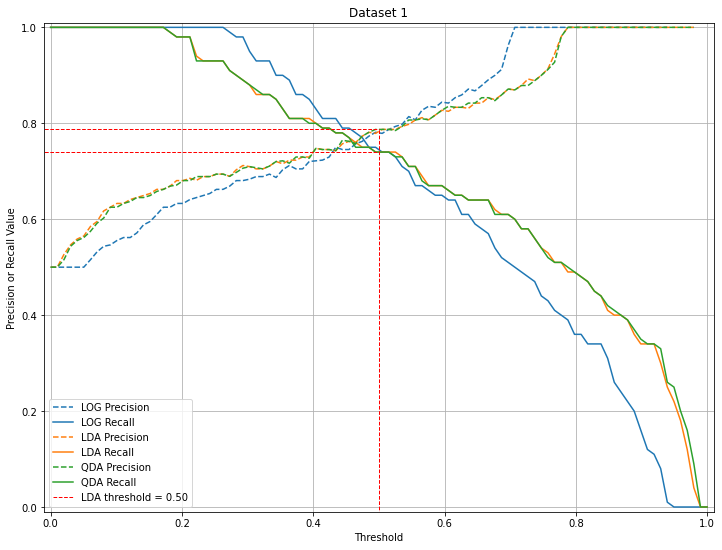

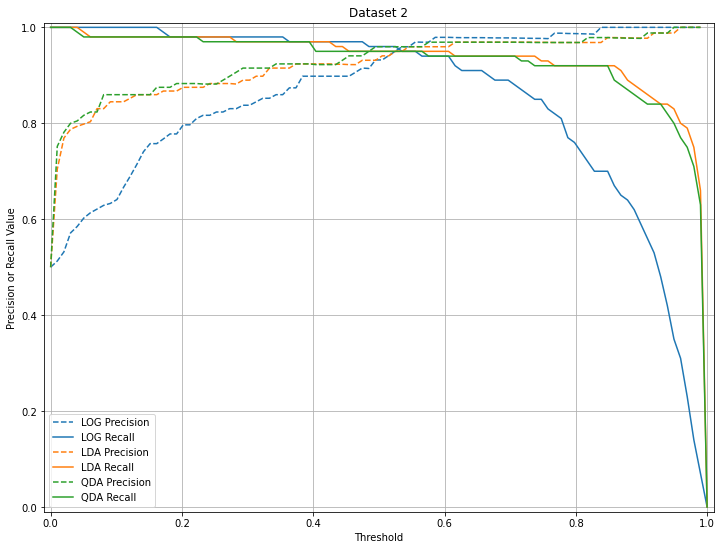

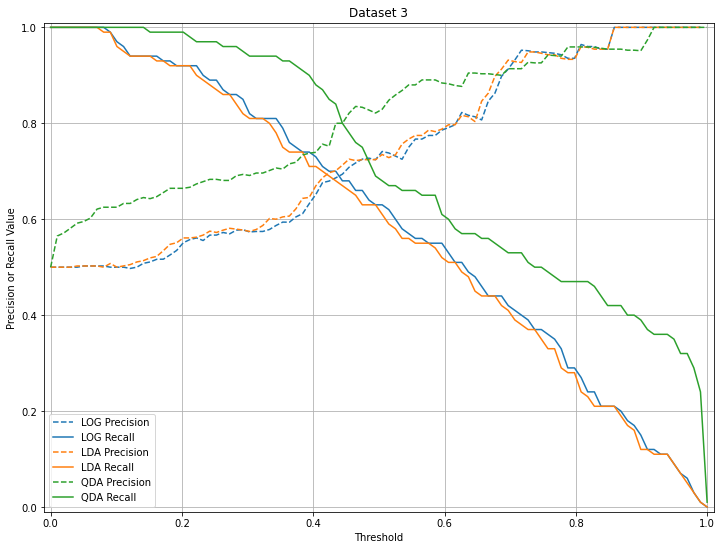

In [ ]:
#STEP 15

#STUDENT CODE - Insert code to generate the Precision/Recall vs Threshold curves
#---------------------------------------------
def plot_precision_recall_vs_threshold(y, predicts, title, selection = None):

    set_plot_size()

    thresholds_best = thresholds_argmax(y, predicts)
    
    for index, method in enumerate(predicts):
        thresholds = np.linspace(0, 1.0, 100)
        # precisions, recalls, thresholds = precision_recall_curve(y, predicts[method])
        # _, _, thresholds = roc_curve(y, predicts[method])
        vals = threshold_metrics(y, predicts[method], thresholds)
        precisions = vals['Precision']
        recalls = vals['Recall']
        plt.plot(thresholds, precisions, '--', color='C' + str(index), label=method.upper() + ' Precision')
        plt.plot(thresholds, recalls, '-', color='C' + str(index), label=method.upper() + ' Recall')

    if selection != None:
        plot_threshold_on_precision_recall_curve(y, predicts, selection)

    set_plot_defaults(title)

    plt.xlabel('Threshold')
    plt.ylabel('Precision or Recall Value')
        
    plt.show()

plot_precision_recall_vs_threshold(y_test_1, predicts1, 'Dataset 1', {'method': 'lda', 'threshold': 0.5})
plot_precision_recall_vs_threshold(y_test_2, predicts2, 'Dataset 2')
plot_precision_recall_vs_threshold(y_test_3, predicts3, 'Dataset 3')
#---------------------------------------------

STEP_15_COMPLETE = True

#### STEP 16: plot recall vs precision

Plot precision vs recall. The x-axis of your plot will be recall values $[0.0, 1.0]$ and the y-axis will be precision values $[0.0, 1.0]$. You will create one plot per dataset and add precision vs recall curves for each model. Use one color per model.

Hints:
- Consider a single function with the signature `plot_precision_vs_recall(y, predicts, title)`. `y` is your test set y-values, `predicts` is the dictionary you created in STEP 10, and `title` is the title of the plot. Thus, `plot_precision_vs_recall` will create a single plot with the precision vs recall curve of three models for that dataset. You would call `plot_precision_recall_vs_threshold` three times, once for each dataset.
- You may use the `sklearn.metrics` `precision_recall_curve` function to generate your precision, recall, and threshold values.
- Pages 93-99 of the _HOML_ text may provide helpful Python code examples
- Here is an example plot from the instructor's solution:
<img src='https://github.com/afit-csce623-master/template-hw2/blob/main/images/dataset1_precision_vs_recall_plot.png?raw=1' />

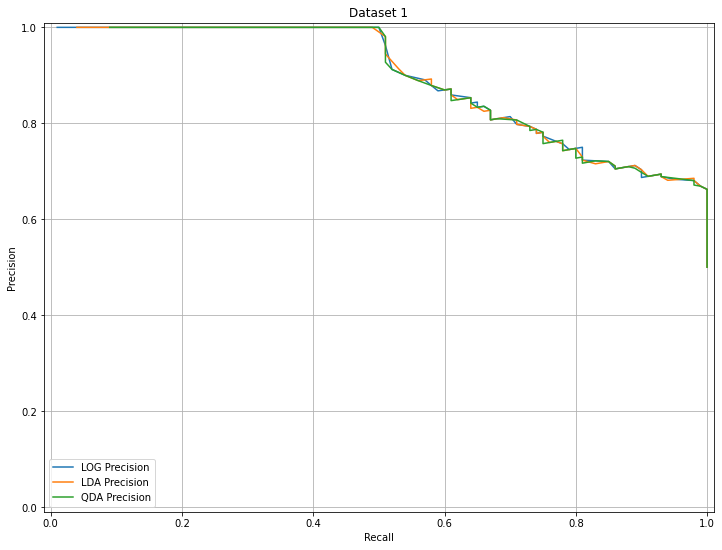

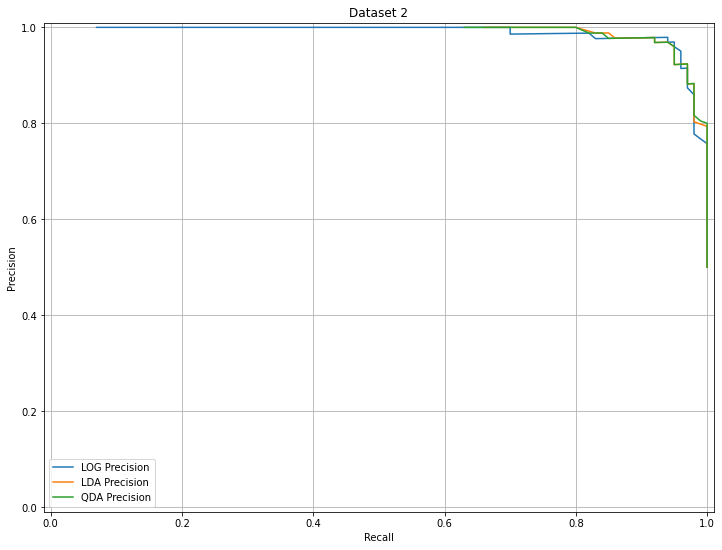

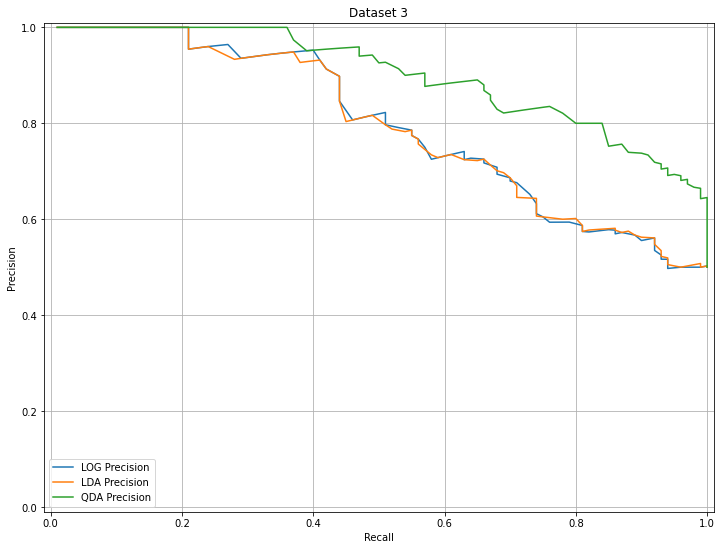

In [ ]:

#STEP 16

#STUDENT CODE - Insert code to generate the precision vs recall curves
#---------------------------------------------
def plot_precision_vs_recall(y, predicts, title, selection = None):

    set_plot_size()

    for index, method in enumerate(predicts):

        thresholds = np.linspace(0, 1.0, 100)
        vals = threshold_metrics(y, predicts[method], thresholds)
        precisions = vals['Precision']
        recalls = vals['Recall']

        # precisions, recalls, thresholds = precision_recall_curve(y, predicts[method])
        plt.plot(recalls, precisions, '-', color='C' + str(index), label=method.upper() + ' Precision')

    if selection != None:
        plot_threshold_on_precision_vs_recall_curve(y, predicts, selection)

    plt.xlabel('Recall')
    plt.ylabel('Precision')

    set_plot_defaults(title)

    plt.show()

plot_precision_vs_recall(y_test_1, predicts1, 'Dataset 1')
plot_precision_vs_recall(y_test_2, predicts2, 'Dataset 2')
plot_precision_vs_recall(y_test_3, predicts3, 'Dataset 3')

#---------------------------------------------

STEP_16_COMPLETE = True

### Model Analysis


#### STEP 17

Using the analysis tools you created in steps 13-16, explain the tradeoff that is occuring when threshold values are selected to maximize accuracy, precision, recall, and F-measure. The discussion you provide here is not intended to be an exhaustive analysis of these datasets and these models in particular. Instead, discuss the general characteristics of these tradeoffs.

<font color="green">Student Answer</font>

In [ ]:
STEP_17_COMPLETE = True

#### STEP 18

#### Written Response

For each dataset, describe which model and threshold value you would recommend using? Why? If it helps you develop your answer, you may be creative with what the data in each dataset represents. For example, you could say, "We will assume Dataset 1 represents the probability an individual will be promoted to the next rank based on features inputs of height and the number of years in service. Therefore... "

Additionally, a previous section (NO STEP: functions for numerical and visual analysis, prior to STEP 13) provides some tools that you may find helpful in your analysis.

- `display_thresholds(y, predicts, method)` will display all relevant threshold and metrics for a particular model. `y` is the test y-values, `predicts` is a predict model you created in STEP 10, and `method` is a string `{'log', 'lda', 'qda'}` referring to the model for which you want to list threshold values and metrics.
- `plot_threshold_on_xxxxxx(y, predicts, selection)` is a set of functions that will overlay a threshold value on a plot. You can the appropriate function into the plot functions you created in steps 14-16. `selection` is a dictionary with two keys, `{method, threshold}`, where `method` is the model `{'log', 'lda', 'qda'}` you want to analyze and `threshold` is a desired threshold. For example, inserting

  `plot_threshold_on_precision_recall_curve(y, predicts, {'method': 'lda', 'threshold': 0.5)` 

  into your plot function in STEP 15 will add lines through precision and recall curves at the threshold value of 0.5. The function will also display the relevant metrics at the threshold value of 0.5.


#### Student Answers

- Dataset 1

  <font color="green">Student Answer</font>


- Dataset 2

  <font color="green">Student Answer</font>


- Dataset 3

  <font color="green">Student Answer</font>

In [ ]:
STEP_18_COMPLETE = True

### Optional: Evaluate Delivered Model & Visualization

#### OPTIONAL STEP 19: evaluate delivered model

Apply the model and threshold paramater you chose in STEP 18 to the vendor's phase 2 data. The phase 2 data is available in variables `phase2_1`, `phase2_2`, and `phase2_3`. As you are simply evaluating your models on phase 2 data, there is no need to split the phase 2 data into train and test cases, though you will want to split the data into X inputs and y outputs. You will then use your model to make predictions or conduct "inference" on the phase 2 dataset, applying your chosen threshold. You'll evaluate the precision, recall, f-measure, and confusion matrices of your model as applied to the Phase 2 dataset. Finally, discuss its similarity and differences to the performance of your model on phase 1 data.

Hints:
- To apply your trained model to the phase 2 data, you'll should execute the following concrete steps:
  - Split `phase2_1` data into `X_phase2_1` and `y_phase2_1`, repeat for datasets 2 and 3
  - Use the appropriate model you created in STEP 8, designating the specific classifier you chose in STEP 18 to use to make predictions. For example, if you decided to use the 'LDA' model for Dataset 3, you would use `models3['lda']` to predict probabilities. Recall that `predict_proba` returns a 2-column array consisting of the probabilities the observation belongs on Class 0 and Class 1. For binary classification, you'll only need the probability that the observation belongs in Class 1.
  - Apply the `threshold` parameter you chose in STEP 18. Broadcasting is a help here. For example, if `phase2_1_predicts` is an array of predictions on Dataset 1 using the model chosen in the previous step, `phase2_1_predicts > threshold` will return an array of `True` and `False` values indicating whether your model predicts that a given an observation is in Class 0 (`False`) or Class 1 (`True`).
  - Generate the precision, recall, f-measure, and confusion matrices by comparing the class assignment array you created in the previous action with the truth values in `y_phase2_1` (or alternative y-values for Dataset 2 or 3)

In [ ]:
#STEP 19

#STUDENT CODE - Insert code to evaluate the performance of the chosen
# models on Phase 2 data
#---------------------------------------------

#---------------------------------------------

Discuss the performance of your model on Phase 2 data compared with its performance on Phase 1 data. Is the performance similar? Why or why not?

<font color="green">Student Answer</font>

In [ ]:
STEP_19_COMPLETE = True

#### OPTIONAL STEP 20: visualize model

For each dataset (`df1`, `df2`, `df3`), plot your chosen model overlayed with all the data in the dataset. Display decision boundaries to show how the model will classify the dataset. Feel free to use [this answer](https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression) at Stack Overflow for inspiration.

This is an sample QDA model applied to Dataset 3.

<img src='https://github.com/afit-csce623-master/template-hw2/blob/main/images/dataset3_model_and_data.png?raw=1' />

<Figure size 864x864 with 0 Axes>

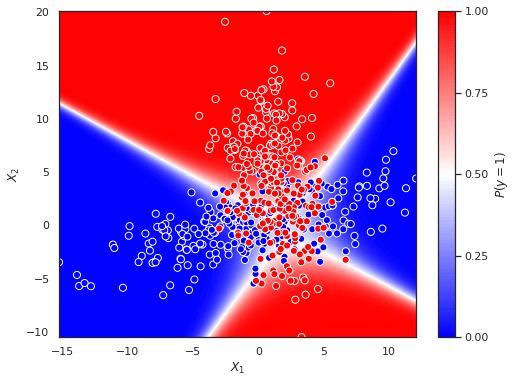

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

set_plot_size(12,12)

X, y = make_classification(200, 2, 2, 0, weights=[0.434001, 0.434001], random_state=15)

clf = LogisticRegression().fit(X[:100], y[:100])
X = df3.loc[:,['X1', 'X2']]
y = df3['Class']
clf = models3['qda']

xx, yy = np.mgrid[-20:20:.005, -20:20:.005]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 100, cmap=plt.cm.bwr,
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X['X1'], X['X2'], c=y, s=50,
           cmap=plt.cm.bwr, #,# vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(#aspect="equal",
       xlim=(min(X['X1']), max(X['X1'])), ylim=(min(X['X2']), max(X['X2'])),
       xlabel="$X_1$", ylabel="$X_2$")

plt.show();